# Figure 4: Strength of modulation by CT feedback is dependent on the presence or absence of the visual stimulus.

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## utils

In [3]:
from hmov_plot import get_color_dict, adjust_spines, plot_opto_cond_psth
color_dict = get_color_dict(color_names=['blue', 'orange', 'green', 'red',
                                         'purple', 'brown', 'pink', 'gray',
                                         'yellow', 'lightblue'])

In [4]:
def find_keys_with_p(keys, ps, p_thr=0.01, p_lower_limit = 0.0):
    inds_thr = np.where(np.array(ps) <= p_thr)[0]
    if p_lower_limit != 0.0:
        inds_lower_limit = np.where(np.array(ps) > p_lower_limit)[0]
        inds = np.intersect1d(inds_thr, inds_lower_limit)
    else:
        inds = inds_thr
        
    return inds, np.array(ps)[inds], np.array(keys)[inds]


def find_keys_within_range(keys, omis, omi_lower, omi_upper):
    inds_lower = np.where(np.array(omis) > omi_lower)[0]
    inds_upper = np.where(np.array(omis) <= omi_upper)[0]
    inds = np.intersect1d(inds_lower, inds_upper)
    
    return inds, np.array(omis)[inds], np.array(keys)[inds]

# example neuron

In [5]:
key = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 19}

## PSTHs Control vs. CT FB suppressed

**TO DO**
* check other examples one final time

Load data:

In [6]:
filename = './data/opto_cond_psths/{:s}_s{:02d}_e{:02d}_u{:02d}.h5'.format(key['m'], key['s'], key['e'], key['u'])
df = pd.read_hdf(filename, "df")

FileNotFoundError: File ./data/opto_cond_psths/Ntsr1Cre_2019_0008_s05_e08_u19.h5 does not exist

In [5]:
df

,m,s,e,u,omi_movie,omi_blank,psths_cond_movie,psths_cond_blank,midbins,labels
0,Ntsr1Cre_2019_0008,5,8,19,-0.388828,-0.706122,"[[29.47070317788562, 29.45674846050635, 29.429...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-0.28400000000000003, -0.28300000000000003, ...",off-on
1,Ntsr1Cre_2019_0008,5,8,19,-0.388828,-0.706122,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.10199236994672643, 0.10583295723458802, 0....",[nan],on-on
2,Ntsr1Cre_2019_0008,5,8,19,-0.388828,-0.706122,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[nan],on-off
3,Ntsr1Cre_2019_0008,5,8,19,-0.388828,-0.706122,"[[6.167519509283322, 6.143962948067712, 6.0971...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[nan],off-off


Get data:

In [6]:
movie_psths = df['psths_cond_movie']
blank_psths = df['psths_cond_blank']
movie_bins = df['midbins'][0][0]
blank_bins = df['midbins'][0][0]
labels = df['labels']

Plotting:

In [7]:
# x-axis
data_fs = 60
filt_len = 50
T = 1 / data_fs
ts = np.arange(-T * filt_len, 0, T)
filt_len2 = 50
ts_spont = np.arange(-T * filt_len2, 0, T)

#0173b2 1.0
k 0.2
c 1.0
k 0.2


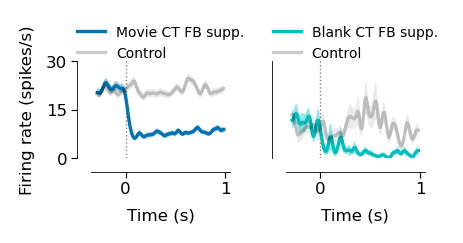

In [8]:
figsize = (2.2, 1.1)
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax = plot_opto_cond_psth(key, movie_psths, movie_bins, labels,
                             offsets=[-0.3, 0], optocond=['off-on',  'off-off'], stimcond='stim',
                             binw=0.032,
                             plot_err='sem', ax=ax, 
                             title_info=None,  legend=True, legend_frame=False,
                             legend_labels=['Movie CT FB supp.', 'on-on', 'on-off', 'Control'],
                             widths=[1.2, 1.2, 1.2, 1.2])
    ax.set_ylim([0,30])
    ax.set_yticks([0, 15, 30])
    ax.set_xlabel('Time (s)')
    #ax.set_title('Movie', y=1.1)
    #ax.legend(ncol=1, frameon=False, bbox_to_anchor=(0.1, 1.35))
    ax.legend(loc='upper center', bbox_to_anchor=[0.5, 1.5], ncol=1, frameon=False)

    ax = ax_dict['b']
    ax = plot_opto_cond_psth(key, blank_psths, blank_bins, labels,
                             offsets=[-0.3, 0], optocond=['off-on',  'off-off'], stimcond='spont',
                             binw=0.032,
                             plot_err='sem', ax=ax, 
                             title_info=None,  legend=True, legend_frame=False,
                             legend_labels=['Blank CT FB supp.', 'on-on', 'on-off', 'Control'],
                             colors=['c', 'powderblue', 'k', 'k'], widths=[1.2, 1.2, 1.2, 1.2])
    ax.set_ylim([0,30])
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('Time (s)')
    #ax.set_title('Blank', y=1.1)
    #ax.legend(ncol=1, frameon=False, bbox_to_anchor=(0.1, 1.5))
    ax.legend(loc='upper center', bbox_to_anchor=[0.5, 1.5], ncol=1, frameon=False)


    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/psths_{:s}_s{:02d}_e{:02d}_u{:02d}.png'.format(key['m'], key['s'], key['e'], key['u']), dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/psths_{:s}_s{:02d}_e{:02d}_u{:02d}.svg'.format(key['m'], key['s'], key['e'], key['u']), bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

# Model opto kernels

Load data:

In [256]:
filename = './data/unbalanced_movie_models.h5'
df_movie = pd.read_hdf(filename, "df")

In [257]:
filename = './data/unbalanced_blank_models.h5'
df_blank = pd.read_hdf(filename, "df_spont")

Restrict to one experiment:

In [258]:
# DF experiment
df_movie_e = df_movie[(df_movie['m']==key['m']) & (df_movie['s']==key['s']) &
                      (df_movie['e']==key['e']) & (df_movie['u']==key['u'])].reset_index()

In [259]:
# DF experiment
df_blank_e = df_blank[(df_blank['m']==key['m']) & (df_blank['s']==key['s']) &
                      (df_blank['e']==key['e']) & (df_blank['u']==key['u'])].reset_index()

Get data:

In [260]:
movie_r = df_movie['perm_score_true_mean']
blank_r = df_blank['perm_score_true_mean']

In [261]:
movie_opto_kernel = np.array(df_movie_e['filt_opto'][0])

In [262]:
movie_opto_kernel_output = np.array(df_movie_e['opto_filt_output'][0])

In [263]:
movie_opto_all_kernels = np.array(df_movie['filt_opto'])

In [264]:
movie_opto_significant_models_df = df_movie[(df_movie['perm_pvalue_opto'] <= 0.05)].reset_index()

In [265]:
movie_opto_significant_kernels = np.vstack(movie_opto_significant_models_df['filt_opto'])

In [266]:
movie_opto_significant_kernels_output = np.vstack(movie_opto_significant_models_df['opto_filt_output'])

In [267]:
movie_opto_all_kernels_output = np.vstack(df_movie['opto_filt_output'])

In [268]:
movie_opto_kernel.shape, movie_opto_significant_kernels.shape

((50,), (11, 50))

In [269]:
movie_mean_kernel = np.mean(movie_opto_significant_kernels, 0)
movie_sem_kernel = stats.sem(movie_opto_significant_kernels, 0)

In [270]:
movie_mean_kernel_output = np.mean(movie_opto_significant_kernels_output, 0)
movie_sem_kernel_output = stats.sem(movie_opto_significant_kernels_output, 0)

In [271]:
movie_model_omis = np.vstack(df_movie['yhat_omis'])

In [272]:
blank_model_omis = np.vstack(df_blank['yhat_omis'])

In [273]:
movie_data_omis = np.vstack(df_movie['data_omis'])

In [274]:
blank_data_omis = np.vstack(df_blank['data_omis'])

In [275]:
blank_opto_kernel = np.array(df_blank_e['filt_opto'][0])

In [276]:
blank_opto_kernel_output = np.array(df_blank_e['opto_filt_output'][0])

In [277]:
blank_opto_all_kernels = np.array(df_blank['filt_opto'])

In [278]:
blank_opto_significant_models_df = df_blank[(df_blank['perm_pvalue_opto'] <= 0.05)].reset_index()

In [279]:
blank_opto_significant_kernels = np.vstack(blank_opto_significant_models_df['filt_opto'])

In [280]:
blank_opto_significant_kernels_output = np.vstack(blank_opto_significant_models_df['opto_filt_output'])

In [281]:
blank_opto_all_kernels_output = np.vstack(df_blank['opto_filt_output'])

In [282]:
blank_opto_kernel.shape, blank_opto_significant_kernels.shape

((50,), (20, 50))

In [283]:
blank_mean_kernel = np.mean(blank_opto_significant_kernels, 0)
blank_sem_kernel = stats.sem(blank_opto_significant_kernels, 0)

In [284]:
blank_mean_kernel_output = np.mean(blank_opto_significant_kernels_output, 0)
blank_sem_kernel_output = stats.sem(blank_opto_significant_kernels_output, 0)

In [285]:
fr_movie_opto, fr_movie_ctrl = df_movie['fr_opto'], df_movie['fr_ctrl']

In [286]:
fr_blank_opto, fr_blank_ctrl = df_blank['fr_opto'], df_blank['fr_ctrl']

In [287]:
fr_movie_opto_sig, fr_movie_ctrl_sig = movie_opto_significant_models_df['fr_opto'], movie_opto_significant_models_df['fr_ctrl']

In [288]:
fr_blank_opto_sig, fr_blank_ctrl_sig = blank_opto_significant_models_df['fr_opto'], blank_opto_significant_models_df['fr_ctrl']

In [289]:
key_fr_movie_opto, key_fr_movie_ctrl = df_movie_e['fr_opto'][0], df_movie_e['fr_ctrl'][0]

In [290]:
key_fr_blank_opto, key_fr_blank_ctrl = df_blank_e['fr_opto'][0], df_blank_e['fr_ctrl'][0]

In [291]:
movie_ok_output_norm = 2*np.array(movie_opto_kernel_output) / (key_fr_movie_ctrl + key_fr_movie_opto)

In [292]:
blank_ok_output_norm = 2*np.array(blank_opto_kernel_output) / (key_fr_blank_ctrl + key_fr_blank_opto)

In [293]:
movie_soks_output_norm = [2*oko / (frc + fro) for oko, frc, fro in
                          zip(movie_opto_significant_kernels_output, 
                              fr_movie_ctrl_sig, fr_movie_opto_sig)]

In [294]:
blank_soks_output_norm = [2*oko / (frc + fro) for oko, frc, fro in
                          zip(blank_opto_significant_kernels_output, 
                              fr_blank_ctrl_sig, fr_blank_opto_sig)]

In [295]:
movie_oks_output_norm = [2*oko / (frc + fro) for oko, frc, fro in
                          zip(movie_opto_all_kernels_output, 
                              fr_movie_ctrl, fr_movie_opto)]

In [296]:
blank_oks_output_norm = [2*oko / (frc + fro) for oko, frc, fro in
                          zip(blank_opto_all_kernels_output, 
                              fr_blank_ctrl, fr_blank_opto)]

In [297]:
movie_mean_kernel_output = np.mean(movie_soks_output_norm, 0)
movie_sem_kernel_output = stats.sem(movie_soks_output_norm, 0)

In [298]:
blank_mean_kernel_output = np.mean(blank_soks_output_norm, 0)
blank_sem_kernel_output = stats.sem(blank_soks_output_norm, 0)

Plotting:

In [299]:
# x-axis
data_fs = 60
filt_len = 50
T = 1 / data_fs
ts = np.arange(-T * filt_len, 0, T)
filt_len2 = 50
ts_spont = np.arange(-T * filt_len2, 0, T)

# x-axis
ts_output = np.arange(-0.5, T * (60*3)-0.5, T)

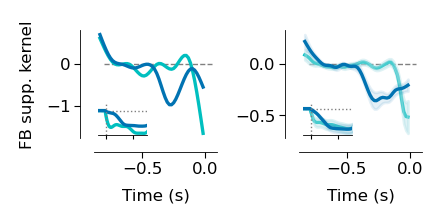

In [300]:
figsize = (2.1, 0.95)
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.hlines(0, -0.8, 0.05, 'gray', linestyle='--', zorder=-1)
    ax.plot(ts_spont, blank_opto_kernel, color='c', zorder=1, lw=1.2, label='Blank')
    ax.plot(ts, movie_opto_kernel, color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    #ax.hlines(y=np.min(blank_opto_kernel), xmin=-.1, xmax=.03, color='tab:red', linestyle='--')
    #ax.hlines(y=np.min(movie_opto_kernel), xmin=-.4, xmax=-.1, color='tab:red', linestyle='--')
    #ax.set_ylim(-.5, 0.2) 
    ax.set_ylabel('FB supp. kernel')
    ax.set_xlabel('Time (s)')
    
    #ax.legend(loc='upper center', bbox_to_anchor=[0.5, 1.5], ncol=1, frameon=False)
    #ax.legend(loc='upper center', bbox_to_anchor=[0.8, 1.2], ncol=1, frameon=False)
    
    # Plot inset histogram of differences
    ax_ins = inset_axes(ax, width="40%", height="30%", loc=3, borderpad=0.25)
    ax_ins.hlines(0, -0.1, 2.5, 'gray', linestyle=':', zorder=-1)
    ax_ins.plot(ts_output, blank_ok_output_norm, color='c', zorder=1, lw=1.2, label='Blank')
    ax_ins.plot(ts_output, movie_ok_output_norm,
                color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    ax_ins.axvline(x=0, linestyle=':', c='grey', zorder=1)  # event onset time
    ax_ins.patch.set_facecolor('none')
    ax_ins.spines['left'].set_visible(False)
    ax_ins.spines['right'].set_visible(False)
    ax_ins.tick_params(bottom=True, left=False, right=True,
                       labelbottom=True, labelleft=False, labelright=True,
                       length=1.5, pad=1, labelsize=5)
    ax_ins.set_yticks([])
    ax_ins.set_xticks([0, 0.5], labels=['', ''])
    ax_ins.set_xlim([-0.15, 0.75])
    
    sns.despine(offset=5, trim=False, ax=ax)
    
    
    ax = ax_dict['b']
    ax.hlines(0, -0.8, 0.05, 'gray', linestyle='--', zorder=-1)
    ax.plot(ts_spont, blank_mean_kernel, color='c', zorder=1, lw=1.2, label='Blank')
    ax.fill_between(ts_spont, blank_mean_kernel - blank_sem_kernel, blank_mean_kernel + blank_sem_kernel, color='powderblue', alpha=0.4)
    ax.plot(ts, movie_mean_kernel, color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    ax.fill_between(ts, movie_mean_kernel - movie_sem_kernel , movie_mean_kernel + movie_sem_kernel, color=color_dict['blue'], alpha=0.1)

    #ax.hlines(y=np.min(blank_opto_kernel), xmin=-.1, xmax=.03, color='tab:red', linestyle='--')
    #ax.hlines(y=np.min(movie_opto_kernel), xmin=-.4, xmax=-.1, color='tab:red', linestyle='--')
    #ax.set_ylim(-.5, 0.2) 
    ax.set_ylabel('')
    ax.set_xlabel('Time (s)')
    #ax.legend(ncol=1, frameon=False, bbox_to_anchor=(1.2, 1.35))
    
    # Plot inset histogram of differences
    ax_ins = inset_axes(ax, width="40%", height="30%", loc=3, borderpad=0.25)
    ax_ins.hlines(0, -0.1, 2.5, 'gray', linestyle=':', zorder=-1)
    ax_ins.plot(ts_output, blank_mean_kernel_output, color='c', zorder=1, lw=1.2, label='Blank')
    ax_ins.fill_between(ts_output, blank_mean_kernel_output - blank_sem_kernel_output,
                    blank_mean_kernel_output + blank_sem_kernel_output,
                    color='powderblue', alpha=0.4)
    ax_ins.plot(ts_output, movie_mean_kernel_output, color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    ax_ins.fill_between(ts_output, movie_mean_kernel_output - movie_sem_kernel_output,
                    movie_mean_kernel_output + movie_sem_kernel_output, color=color_dict['blue'], alpha=0.1)
    ax_ins.axvline(x=0, linestyle=':', c='grey', zorder=1)  # event onset time
    ax_ins.patch.set_facecolor('none')
    ax_ins.spines['left'].set_visible(False)
    ax_ins.spines['right'].set_visible(False)
    ax_ins.tick_params(bottom=True, left=False, right=True,
                       labelbottom=True, labelleft=False, labelright=True,
                       length=1.5, pad=1, labelsize=5)
    ax_ins.set_yticks([])
    ax_ins.set_xticks([0, 0.5], labels=['', ''])
    ax_ins.set_xlim([-0.15, 0.75])

    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/model_opto_kernels.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/model_opto_kernels.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

## opto kernel ouputs

In [63]:
# x-axis
data_fs = 60
filt_len = 60*3
T = 1 / data_fs
ts = np.arange(-0.5, T * filt_len-0.5, T)

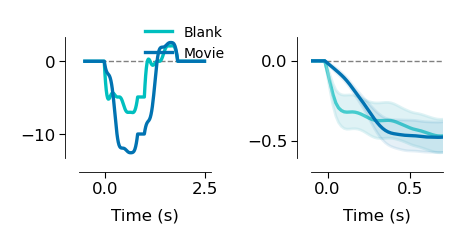

In [64]:
figsize = (2.2, 1.1)
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.hlines(0, -0.1, 2.5, 'gray', linestyle='--', zorder=-1)
    ax.plot(ts, blank_opto_kernel_output, color='c', zorder=1, lw=1.2, label='Blank')
    ax.plot(ts, movie_opto_kernel_output,
            color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    #ax.hlines(y=np.min(blank_opto_kernel), xmin=-.1, xmax=.03, color='tab:red', linestyle='--')
    #ax.hlines(y=np.min(movie_opto_kernel), xmin=-.4, xmax=-.1, color='tab:red', linestyle='--')
    #ax.set_ylim(-.5, 0.2) 
    ax.set_ylabel('')
    ax.set_xlabel('Time (s)')
    ax.legend(loc='upper center', bbox_to_anchor=[0.8, 1.2], ncol=1, frameon=False)
    sns.despine(offset=5, trim=False, ax=ax)
    
    
    ax = ax_dict['b']
    ax.hlines(0, -0.1, 2.5, 'gray', linestyle='--', zorder=-1)
    ax.plot(ts, blank_mean_kernel_output, color='c', zorder=1, lw=1.2, label='Blank')
    ax.fill_between(ts, blank_mean_kernel_output - blank_sem_kernel_output,
                    blank_mean_kernel_output + blank_sem_kernel_output,
                    color='powderblue', alpha=0.4)
    ax.plot(ts, movie_mean_kernel_output, color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    ax.fill_between(ts, movie_mean_kernel_output - movie_sem_kernel_output,
                    movie_mean_kernel_output + movie_sem_kernel_output, color=color_dict['blue'], alpha=0.1)
    

    #ax.hlines(y=np.min(blank_opto_kernel), xmin=-.1, xmax=.03, color='tab:red', linestyle='--')
    #ax.hlines(y=np.min(movie_opto_kernel), xmin=-.4, xmax=-.1, color='tab:red', linestyle='--')
    #ax.set_ylim(-.5, 0.2) 
    ax.set_ylabel('')
    ax.set_xlabel('Time (s)')
    #ax.legend(ncol=1, frameon=False, bbox_to_anchor=(1.2, 1.35))
    ax.set_xlim([-0.1, 0.7])
    
    

    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/model_opto_kernels_output.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/model_opto_kernels_output.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

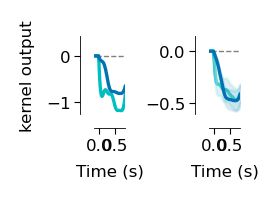

In [53]:
figsize = (1.2, 0.8)
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.hlines(0, -0.1, 2.5, 'gray', linestyle='--', zorder=-1)
    ax.plot(ts, blank_ok_output_norm, color='c', zorder=1, lw=1.2, label='Blank')
    ax.plot(ts, movie_ok_output_norm,
            color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    #ax.hlines(y=np.min(blank_opto_kernel), xmin=-.1, xmax=.03, color='tab:red', linestyle='--')
    #ax.hlines(y=np.min(movie_opto_kernel), xmin=-.4, xmax=-.1, color='tab:red', linestyle='--')
    #ax.set_ylim(-.5, 0.2) 
    ax.set_ylabel('kernel output')
    ax.set_xlabel('Time (s)')
    ax.set_xlim([-0.15, 0.8])
    #ax.legend(loc='upper center', bbox_to_anchor=[0.8, 1.2], ncol=1, frameon=False)
    sns.despine(offset=5, trim=False, ax=ax)
    
    
    ax = ax_dict['b']
    ax.hlines(0, -0.1, 2.5, 'gray', linestyle='--', zorder=-1)
    ax.plot(ts, blank_mean_kernel_output, color='c', zorder=1, lw=1.2, label='Blank')
    ax.fill_between(ts, blank_mean_kernel_output - blank_sem_kernel_output,
                    blank_mean_kernel_output + blank_sem_kernel_output,
                    color='powderblue', alpha=0.4)
    ax.plot(ts, movie_mean_kernel_output, color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    ax.fill_between(ts, movie_mean_kernel_output - movie_sem_kernel_output,
                    movie_mean_kernel_output + movie_sem_kernel_output, color=color_dict['blue'], alpha=0.1)

    #ax.hlines(y=np.min(blank_opto_kernel), xmin=-.1, xmax=.03, color='tab:red', linestyle='--')
    #ax.hlines(y=np.min(movie_opto_kernel), xmin=-.4, xmax=-.1, color='tab:red', linestyle='--')
    #ax.set_ylim(-.5, 0.2) 
    ax.set_ylabel('')
    ax.set_xlabel('Time (s)')
    #ax.legend(ncol=1, frameon=False, bbox_to_anchor=(1.2, 1.35))
    ax.set_xlim([-0.15, 0.8])
    

    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/model_opto_kernels_output.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/model_opto_kernels_output.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

# Population

## OMI scatters

load data

In [335]:
filename = './data/populaion_opto_effects.h5'
df_pop = pd.read_hdf(filename, "df")

In [336]:
omis_movie, omis_blank = np.hstack(df_pop['omi_movie']), np.hstack(df_pop['omi_blank'])

In [337]:
df_ex_key = df_pop[(df_pop['m']==key['m']) & (df_pop['s']==key['s']) &
                   (df_pop['e']==key['e']) & (df_pop['u']==key['u'])].reset_index()

In [338]:
key_omi_movie, key_omi_blank = df_ex_key['omi_movie'][0], df_ex_key['omi_blank'][0]

In [339]:
key_omi_movie, key_omi_blank

(-0.388828, -0.706122)

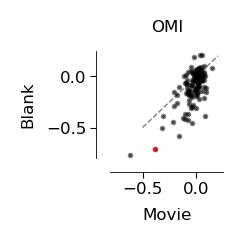

In [345]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([-0.5, 0.2], [-0.5, 0.2], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(omis_movie, omis_blank, color='k', s=4, alpha=0.5)
    ax.scatter(key_omi_movie, key_omi_blank, c='r', s=4, alpha=0.5)
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    #axpos = ax.get_position()
    #ax.set_position([axpos.x0+0.1, axpos.y0,  axpos.width, axpos.height])

    ax.set_ylim([-0.8, 0.25])
    ax.set_xlim([-0.8, 0.25])
    #ax.set_ylim([0,30])
    #ax.set_yticks([0, 15, 30])
    ax.set_title('OMI', y=1.1)
    

    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/omi_movie_vs_blank.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/omi_movie_vs_blank.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

## Rate of change (RoC) of firing rates

In [260]:
filename = './data/populaion_opto_effects.h5'
df_pop = pd.read_hdf(filename, "df")

In [261]:
movie_RoC, blank_RoC = np.hstack(df_pop['movie_RoC']), np.hstack(df_pop['blank_RoC'])

In [262]:
df_ex_key = df_pop[(df_pop['m']==key['m']) & (df_pop['s']==key['s']) &
                   (df_pop['e']==key['e']) & (df_pop['u']==key['u'])].reset_index()

In [263]:
key_movie_RoC, key_blank_RoC = df_ex_key['movie_RoC'][0], df_ex_key['blank_RoC'][0]

In [264]:
key_movie_RoC, key_blank_RoC

(0.11253766441023316, 0.3550593800459527)

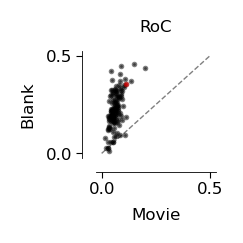

In [265]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([0, 0.5], [0,0.5], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(movie_RoC, blank_RoC, color='k', s=4, alpha=0.5)
    ax.scatter(key_movie_RoC, key_blank_RoC, c='r', s=4, alpha=0.5)
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    #axpos = ax.get_position()
    #ax.set_position([axpos.x0+0.1, axpos.y0,  axpos.width, axpos.height])

    #ax.set_ylim([0,30])
    #ax.set_yticks([0, 15, 30])
    ax.set_title('RoC', y=1.1)
    

    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/RoC_movie_vs_blank.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/RoC_movie_vs_blank.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

## Kernel minimum

get data

In [266]:
movie_kernel_min_value = [np.min(kernel) for kernel in movie_opto_all_kernels]

In [267]:
np.min(blank_kernel_min_value)

-2.9406965

In [268]:
blank_kernel_min_value = [np.min(kernel) for kernel in blank_opto_all_kernels]

In [269]:
key_movie_kernel_min_value = np.min(movie_opto_kernel)

In [270]:
key_blank_kernel_min_value = np.min(blank_opto_kernel)

plotting

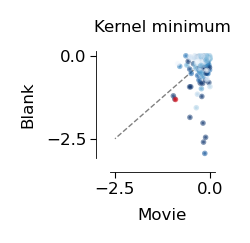

In [271]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([0, -2.5], [0, -2.5], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(movie_kernel_min_value, blank_kernel_min_value, vmax=0.2,
               c=np.abs(omis_blank), cmap='Blues', s=4, alpha=0.5)
    ax.scatter(key_movie_kernel_min_value, key_blank_kernel_min_value, c='r', s=4, alpha=0.5)
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    #axpos = ax.get_position()
    #ax.set_position([axpos.x0+0.1, axpos.y0,  axpos.width, axpos.height])

    #ax.set_ylim([0,30])
    #ax.set_yticks([0, 15, 30])
    ax.set_title('Kernel minimum', y=1.1)
    

    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/Kernel_min_movie_vs_blank.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/Kernel_min_movie_vs_blank.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

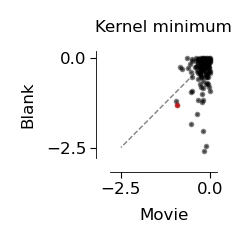

In [272]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([0, -2.5], [0, -2.5], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(movie_kernel_min_value, blank_kernel_min_value, color='k', s=4, alpha=0.5)
    ax.scatter(key_movie_kernel_min_value, key_blank_kernel_min_value, c='r', s=4, alpha=0.5)
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    #axpos = ax.get_position()
    #ax.set_position([axpos.x0+0.1, axpos.y0,  axpos.width, axpos.height])

    ax.set_ylim([-2.8, 0.2])
    ax.set_xlim([-2.8, 0.2])
    #ax.set_yticks([0, 15, 30])
    ax.set_title('Kernel minimum', y=1.1)
    

    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/Kernel_min_movie_vs_blank.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/Kernel_min_movie_vs_blank.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

## kernel Area under the curve

getting data

In [86]:
pulse_idx = [30-2, 90-5]
movie_AUC = [np.trapz(x[pulse_idx[0] : pulse_idx[1]]) for x in movie_oks_output_norm]
blank_AUC = [np.trapz(x[pulse_idx[0] : pulse_idx[1]]) for x in blank_oks_output_norm]

In [87]:
key_movie_AUC = np.trapz(movie_ok_output_norm[pulse_idx[0] : pulse_idx[1]])
key_blank_AUC = np.trapz(blank_ok_output_norm[pulse_idx[0] : pulse_idx[1]])

In [88]:
pulse_idx_100ms = [30-2, 36]
movie_AUC_100ms = [np.trapz(x[pulse_idx_100ms[0] : pulse_idx_100ms[1]]) for x in movie_oks_output_norm]
blank_AUC_100ms = [np.trapz(x[pulse_idx_100ms[0] : pulse_idx_100ms[1]]) for x in blank_oks_output_norm]

In [285]:
key_movie_AUC_100ms = np.trapz(movie_ok_output_norm[pulse_idx_100ms[0] : pulse_idx_100ms[1]])
key_blank_AUC_100ms = np.trapz(blank_ok_output_norm[pulse_idx_100ms[0] : pulse_idx_100ms[1]])

In [92]:
pulse_idx_100ms = [30-2, 36]
movie_AUC_100ms = [np.trapz(x[pulse_idx_100ms[0] : pulse_idx_100ms[1]]) for x in movie_opto_all_kernels_output]
blank_AUC_100ms = [np.trapz(x[pulse_idx_100ms[0] : pulse_idx_100ms[1]]) for x in blank_opto_all_kernels_output]

In [93]:
key_movie_AUC_100ms = np.trapz(movie_opto_kernel_output[pulse_idx_100ms[0] : pulse_idx_100ms[1]])
key_blank_AUC_100ms = np.trapz(blank_opto_kernel_output[pulse_idx_100ms[0] : pulse_idx_100ms[1]])

plotting

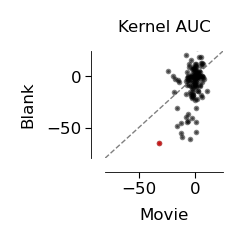

In [279]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([25, -80], [25, -80], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(movie_AUC, blank_AUC, color='k', s=4, alpha=0.5)
    ax.scatter(key_movie_AUC, key_blank_AUC, c='r', s=4, alpha=0.5)
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    #axpos = ax.get_position()
    #ax.set_position([axpos.x0+0.1, axpos.y0,  axpos.width, axpos.height])

    ax.set_ylim([-80, 25])
    ax.set_xlim([-80, 25])
    #ax.set_yticks([0, 15, 30])
    ax.set_title('Kernel AUC', y=1.1)
    

    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/Kernel_AUC_movie_vs_blank.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/Kernel_AUC_movie_vs_blank.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

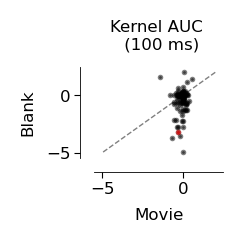

In [286]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([2, -5], [2, -5], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(movie_AUC_100ms, blank_AUC_100ms, color='k', s=4, alpha=0.5)
    ax.scatter(key_movie_AUC_100ms, key_blank_AUC_100ms, c='r', s=4, alpha=0.5)
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    #axpos = ax.get_position()
    #ax.set_position([axpos.x0+0.1, axpos.y0,  axpos.width, axpos.height])

    ax.set_ylim([-5.5, 2.5])
    ax.set_xlim([-5.5, 2.5])
    #ax.set_yticks([0, 15, 30])
    ax.set_title('Kernel AUC \n (100 ms)', y=1.1)
    

    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/Kernel_AUC_100ms_movie_vs_blank.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/Kernel_AUC_100ms_movie_vs_blank.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

## kernel OMI

getting data

In [233]:
movie_model_omis = np.vstack(df_movie[df_blank['perm_score_true_mean'] > 0.1]['yhat_omis'])

In [234]:
len(movie_model_omis), len(blank_model_omis)

(58, 58)

In [235]:
blank_model_omis = np.vstack(df_blank[df_blank['perm_score_true_mean'] > 0.1]['yhat_omis'])

In [236]:
movie_data_omis = np.vstack(df_movie[df_blank['perm_score_true_mean'] > 0.1]['data_omis'])

In [237]:
blank_data_omis = np.vstack(df_blank[df_blank['perm_score_true_mean'] > 0.1]['data_omis'])

In [238]:
movie_omis = np.vstack(df_movie[df_blank['perm_score_true_mean'] > 0.1]['omi_movie'])
blank_omis = np.vstack(df_blank[df_blank['perm_score_true_mean'] > 0.1]['omi_blank'])

In [302]:
fr_opto, fr_ctrl = df_movie['fr_opto'], df_movie['fr_ctrl']

In [314]:
fr_opto_blank, fr_ctrl_blank = df_blank['fr_opto'], df_blank['fr_ctrl']

In [363]:
model_movie_sub = [np.mean(x[32:80])/(frc+fro) for x, frc, fro in zip(movie_opto_all_kernels_output, fr_ctrl, fr_opto)]
model_blank_sub = [np.mean(x[32:80])/(frc+fro) for x, frc, fro in zip(blank_opto_all_kernels_output, fr_ctrl_blank, fr_opto_blank)]

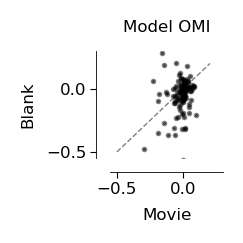

In [364]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([-0.5, 0.2], [-0.5, 0.2], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(model_movie_sub, model_blank_sub, color='k', s=4, alpha=0.5)
    #ax.scatter(key_movie_AUC_100ms, key_blank_AUC_100ms, c='r', s=4, alpha=0.5)
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    #axpos = ax.get_position()
    #ax.set_position([axpos.x0+0.1, axpos.y0,  axpos.width, axpos.height])

    ax.set_ylim([-0.55, 0.3])
    ax.set_xlim([-0.55, 0.3])
    #ax.set_yticks([0, 15, 30])
    ax.set_title('Model OMI', y=1.1)
    

    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/Kernel_omis_movie_vs_blank.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/Kernel_omis_movie_vs_blank.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

In [353]:
model_movie_sub = [np.mean(x[28:36])/(frc+fro) for x, frc, fro in zip(movie_opto_all_kernels_output, fr_ctrl, fr_opto)]
model_blank_sub = [np.mean(x[28:36])/(frc+fro) for x, frc, fro in zip(blank_opto_all_kernels_output, fr_ctrl_blank, fr_opto_blank)]

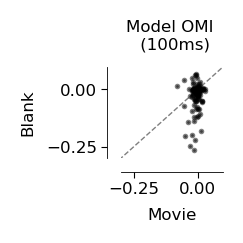

In [359]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([-0.5, 0.2], [-0.5, 0.2], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(model_movie_sub, model_blank_sub, color='k', s=4, alpha=0.5)
    #ax.scatter(key_movie_AUC_100ms, key_blank_AUC_100ms, c='r', s=4, alpha=0.5)
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    #axpos = ax.get_position()
    #ax.set_position([axpos.x0+0.1, axpos.y0,  axpos.width, axpos.height])

    ax.set_ylim([-0.3, 0.1])
    ax.set_xlim([-0.3, 0.1])
    #ax.set_yticks([0, 15, 30])
    ax.set_title('Model OMI \n (100ms)', y=1.1)
    

    sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/Kernel_omis_100ms_movie_vs_blank.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/Kernel_omis_100ms_movie_vs_blank.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

# Leftovers please delete

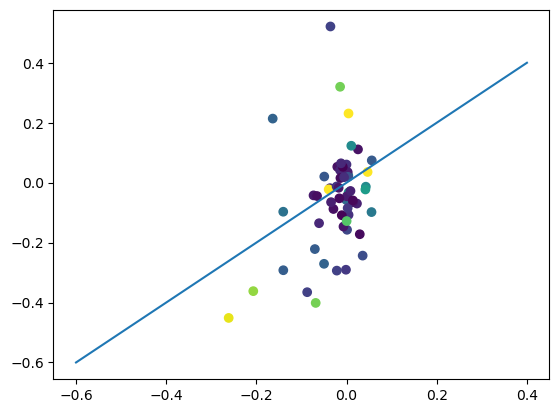

In [239]:
plt.scatter(np.nanmean(movie_model_omis, 1), np.nanmean(blank_model_omis, 1), c=np.abs(np.nanmean(blank_data_omis, 1)))
plt.plot([-0.6, 0.4], [-0.6, 0.4])

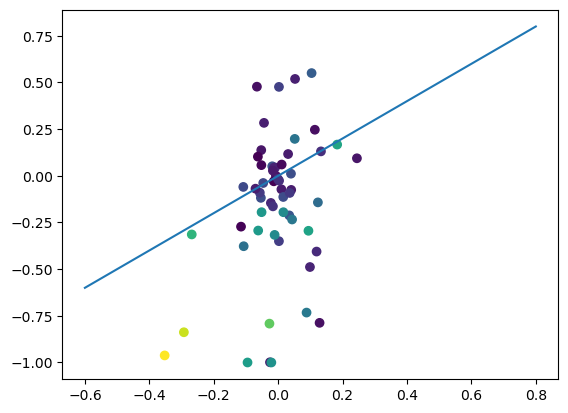

In [240]:
plt.scatter(np.nanmean(movie_data_omis, 1), np.nanmean(blank_data_omis, 1), c=np.abs(blank_omis))
plt.plot([-0.6, 0.8], [-0.6, 0.8])

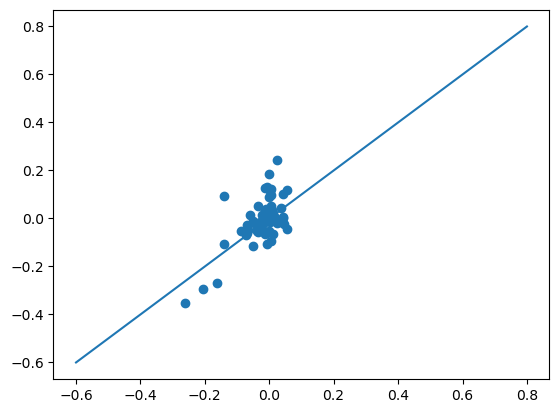

In [241]:
plt.scatter(np.nanmean(movie_model_omis, 1), np.nanmean(movie_data_omis, 1))#, c=movie_r)#np.abs(omis_movie), alpha=0.7)
plt.plot([-0.6, 0.8], [-0.6, 0.8])

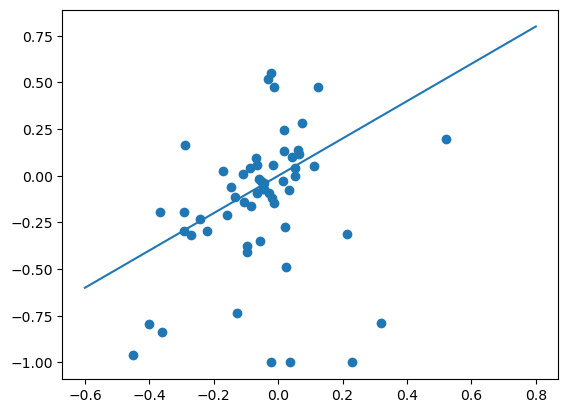

In [242]:
plt.scatter(np.nanmean(blank_model_omis, 1), np.nanmean(blank_data_omis, 1))#, c=blank_r)#np.abs(omis_blank), alpha=0.7)
plt.plot([-0.6, 0.8], [-0.6, 0.8])

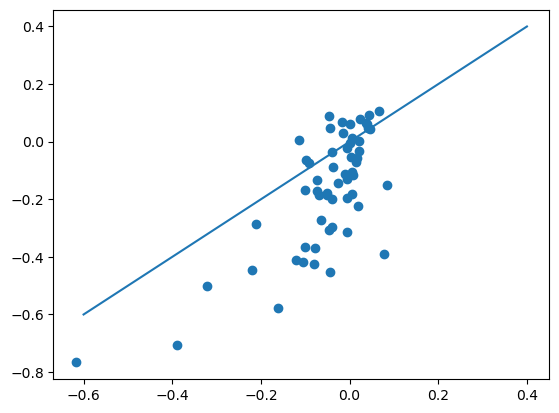

In [243]:
plt.scatter(movie_omis, blank_omis)#, c=blank_r)
plt.plot([-0.6, 0.4], [-0.6, 0.4])

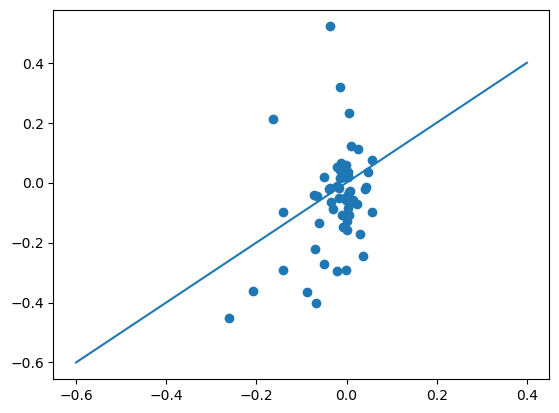

In [244]:
plt.scatter(np.nanmean(movie_model_omis, 1), np.nanmean(blank_model_omis, 1))#, c=blank_r)
plt.plot([-0.6, 0.4], [-0.6, 0.4])
#plt.ylim([-0.6, 0.5])
#plt.xlim([-0.6, 0.5])

In [245]:
movie_model_omis.shape

(58, 76)

In [303]:
sub = [o-c for o, c in zip(fr_opto, fr_ctrl)]

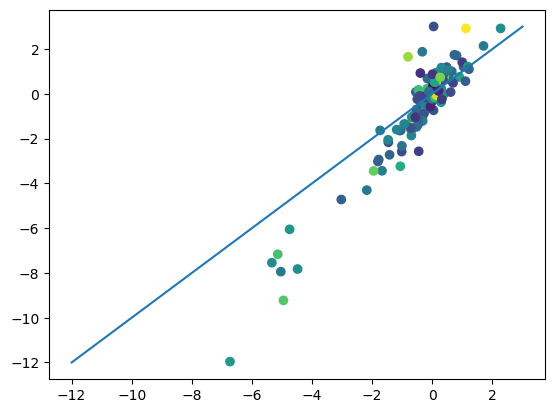

In [311]:
plt.scatter(model_sub, sub, c=movie_r)
plt.plot([-12, 3], [-12, 3])

(-0.7, 0.5)

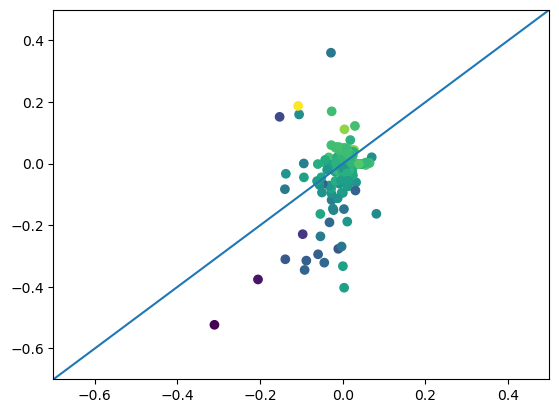

In [330]:
plt.scatter(model_movie_sub, model_blank_sub, c=omis_blank)
plt.plot([-12, 3], [-12, 3])
plt.xlim([-0.7, 0.5])
plt.ylim([-0.7, 0.5])

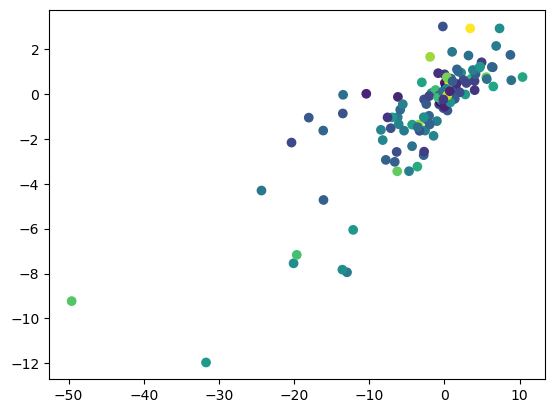

In [305]:
plt.scatter(movie_AUC, sub, c=movie_r)

In [139]:
fr_opto, fr_ctrl = df_blank['fr_ctrl'], df_blank['fr_opto']

In [140]:
sub = fr_opto - fr_ctrl

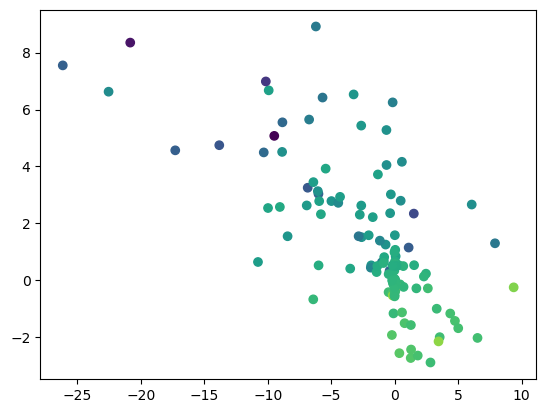

In [143]:
plt.scatter(blank_AUC_100ms, sub, c=omis_blank)

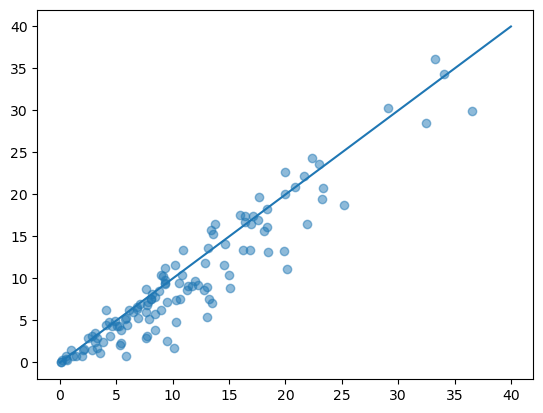

In [148]:
plt.scatter(fr_opto, fr_ctrl, alpha=0.5)
plt.plot([0, 40], [0, 40])

# Neurons counts

In [151]:
def find_keys_with_p(ps, p_thr=0.01, p_lower_limit = 0.0):
    inds_thr = np.where(np.array(ps) <= p_thr)[0]
    if p_lower_limit != 0.0:
        inds_lower_limit = np.where(np.array(ps) > p_lower_limit)[0]
        inds = np.intersect1d(inds_thr, inds_lower_limit)
    else:
        inds = inds_thr
        
    return inds, np.array(ps)[inds]


def find_keys_within_range(omis, omi_lower, omi_upper):
    inds_lower = np.where(np.array(omis) > omi_lower)[0]
    inds_upper = np.where(np.array(omis) <= omi_upper)[0]
    inds = np.intersect1d(inds_lower, inds_upper)
    
    return inds, np.array(omis)[inds]

## raw data

In [202]:
stim_neg, _ = find_keys_within_range(omis_movie, -1.0, -0.1)
stim_null, _ = find_keys_within_range(omis_movie, -0.1, 0.1)
stim_pos, _ = find_keys_within_range(omis_movie, 0.1, 1.0)

spont_neg, _ = find_keys_within_range(omis_blank, -1.0, -0.1)
spont_null, _ = find_keys_within_range(omis_blank, -0.1, 0.1)
spont_pos, _ = find_keys_within_range(omis_blank, 0.1, 1.0)


len(stim_neg), len(stim_null), len(stim_pos), len(spont_neg), len(spont_null), len(spont_pos)

(18, 103, 1, 53, 64, 5)

In [203]:
stim_neg_spont_neg = np.intersect1d(stim_neg, spont_neg)
stim_neg_spont_null = np.intersect1d(stim_neg, spont_null)
stim_neg_spont_pos = np.intersect1d(stim_neg, spont_pos)

stim_null_spont_neg = np.intersect1d(stim_null, spont_neg)
stim_null_spont_null = np.intersect1d(stim_null, spont_null)
stim_null_spont_pos = np.intersect1d(stim_null, spont_pos)

stim_pos_spont_neg = np.intersect1d(stim_pos, spont_neg)
stim_pos_spont_null = np.intersect1d(stim_pos, spont_null)
stim_pos_spont_pos = np.intersect1d(stim_pos, spont_pos)

len(stim_neg_spont_neg), len(stim_neg_spont_null), len(stim_neg_spont_pos), \
len(stim_null_spont_neg), len(stim_null_spont_null), len(stim_null_spont_pos), \
len(stim_pos_spont_neg), len(stim_pos_spont_null), len(stim_pos_spont_pos)

(14, 3, 1, 39, 60, 4, 0, 1, 0)

In [204]:
col1 = np.array([len(stim_neg_spont_neg), len(stim_neg_spont_null), len(stim_neg_spont_pos)])
col2 = np.array([len(stim_null_spont_neg), len(stim_null_spont_null), len(stim_null_spont_pos)])
col3 = np.array([len(stim_pos_spont_neg), len(stim_pos_spont_null), len(stim_pos_spont_pos)])

mat = [col1[::-1], col2[::-1], col3[::-1]]

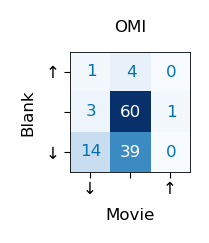

In [205]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    
    ax.imshow(np.array(mat).T, cmap='Blues')
    ax.text(-0.1, 0.1, col1[-1], color=color_dict['blue'])
    ax.text(-0.1, 1.1, col1[-2], color=color_dict['blue'])
    ax.text(-0.25, 2.1, col1[0], color=color_dict['blue'])

    ax.text(0.9, 0.12, col2[-1], color=color_dict['blue'])
    ax.text(0.75, 1.12, col2[-2], color='white')
    ax.text(0.75, 2.12, col2[0], color='white')

    ax.text(1.9, 0.12, col3[-1], color=color_dict['blue'])
    ax.text(1.9, 1.12, col3[-2], color=color_dict['blue'])
    ax.text(1.9, 2.12, col3[0], color=color_dict['blue'])
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    ax.set_xticks([0, 1, 2], [u'\u2193', '', u'\u2191'])
    ax.set_yticks([2, 1, 0], [u'\u2193', '', u'\u2191'])
    #axpos = ax.get_position()
    #ax.set_position([axpos.x0+0.1, axpos.y0,  axpos.width, axpos.height])

    #ax.set_ylim([0,30])
    #ax.set_yticks([0, 15, 30])
    ax.set_title('OMI', y=1.1)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    

    #sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/omi_movie_vs_blank.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/omi_movie_vs_blank.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

## model

In [206]:
stim_neg, _ = find_keys_within_range(movie_AUC, -1000, -8)
stim_null, _ = find_keys_within_range(movie_AUC, -8, 8)
stim_pos, _ = find_keys_within_range(movie_AUC, 8, 1000)

spont_neg, _ = find_keys_within_range(blank_AUC, -1000, -8)
spont_null, _ = find_keys_within_range(blank_AUC, -8, 8)
spont_pos, _ = find_keys_within_range(blank_AUC, 8, 1000)


len(stim_neg), len(stim_null), len(stim_pos), len(spont_neg), len(spont_null), len(spont_pos)

(17, 102, 3, 41, 70, 11)

In [207]:
stim_neg_spont_neg = np.intersect1d(stim_neg, spont_neg)
stim_neg_spont_null = np.intersect1d(stim_neg, spont_null)
stim_neg_spont_pos = np.intersect1d(stim_neg, spont_pos)

stim_null_spont_neg = np.intersect1d(stim_null, spont_neg)
stim_null_spont_null = np.intersect1d(stim_null, spont_null)
stim_null_spont_pos = np.intersect1d(stim_null, spont_pos)

stim_pos_spont_neg = np.intersect1d(stim_pos, spont_neg)
stim_pos_spont_null = np.intersect1d(stim_pos, spont_null)
stim_pos_spont_pos = np.intersect1d(stim_pos, spont_pos)

len(stim_neg_spont_neg), len(stim_neg_spont_null), len(stim_neg_spont_pos), \
len(stim_null_spont_neg), len(stim_null_spont_null), len(stim_null_spont_pos), \
len(stim_pos_spont_neg), len(stim_pos_spont_null), len(stim_pos_spont_pos)

(8, 6, 3, 32, 62, 8, 1, 2, 0)

In [208]:
col1 = np.array([len(stim_neg_spont_neg), len(stim_neg_spont_null), len(stim_neg_spont_pos)])
col2 = np.array([len(stim_null_spont_neg), len(stim_null_spont_null), len(stim_null_spont_pos)])
col3 = np.array([len(stim_pos_spont_neg), len(stim_pos_spont_null), len(stim_pos_spont_pos)])

mat = [col1[::-1], col2[::-1], col3[::-1]]

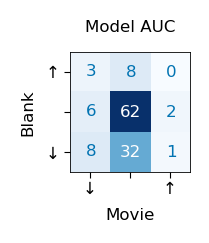

In [212]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    
    ax.imshow(np.array(mat).T, cmap='Blues')
    ax.text(-0.1, 0.1, col1[-1], color=color_dict['blue'])
    ax.text(-0.1, 1.1, col1[-2], color=color_dict['blue'])
    ax.text(-0.1, 2.1, col1[0], color=color_dict['blue'])

    ax.text(0.9, 0.12, col2[-1], color=color_dict['blue'])
    ax.text(0.75, 1.12, col2[-2], color='white')
    ax.text(0.75, 2.12, col2[0], color='white')

    ax.text(1.9, 0.12, col3[-1], color=color_dict['blue'])
    ax.text(1.9, 1.12, col3[-2], color=color_dict['blue'])
    ax.text(1.9, 2.12, col3[0], color=color_dict['blue'])
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    ax.set_xticks([0, 1, 2], [u'\u2193', '', u'\u2191'])
    ax.set_yticks([2, 1, 0], [u'\u2193', '', u'\u2191'])
    #axpos = ax.get_position()
    #ax.set_position([axpos.x0+0.1, axpos.y0,  axpos.width, axpos.height])

    #ax.set_ylim([0,30])
    #ax.set_yticks([0, 15, 30])
    ax.set_title('Model AUC', y=1.1)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    

    #sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/AUC_direction_stim_vs_spont.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/AUC_direction_stim_vs_spont.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

In [218]:
stim_3star, _ = find_keys_with_p(df_movie['perm_pvalue_opto'], p_thr=0.011, p_lower_limit = 0.0)
stim_1star, _ = find_keys_with_p(df_movie['perm_pvalue_opto'], p_thr=0.051, p_lower_limit = 0.01)
stim_0star, _ = find_keys_with_p(df_movie['perm_pvalue_opto'], p_thr=1.0, p_lower_limit = 0.05)

spont_3star, _ = find_keys_with_p(df_blank['perm_pvalue_opto'], p_thr=0.011, p_lower_limit = 0.0)
spont_1star, _ = find_keys_with_p(df_blank['perm_pvalue_opto'], p_thr=0.051, p_lower_limit = 0.01)
spont_0star, _ = find_keys_with_p(df_blank['perm_pvalue_opto'], p_thr=1.0, p_lower_limit = 0.05)


len(stim_3star), len(stim_1star), len(stim_0star), len(spont_3star), len(spont_1star), len(spont_0star)

(9, 2, 111, 13, 7, 102)

In [219]:
stim_3star_spont_3star = np.intersect1d(stim_3star, spont_3star)
stim_3star_spont_1star = np.intersect1d(stim_3star, spont_1star)
stim_3star_spont_0star = np.intersect1d(stim_3star, spont_0star)

stim_1star_spont_3star = np.intersect1d(stim_1star, spont_3star)
stim_1star_spont_1star = np.intersect1d(stim_1star, spont_1star)
stim_1star_spont_0star = np.intersect1d(stim_1star, spont_0star)

stim_0star_spont_3star = np.intersect1d(stim_0star, spont_3star)
stim_0star_spont_1star = np.intersect1d(stim_0star, spont_1star)
stim_0star_spont_0star = np.intersect1d(stim_0star, spont_0star)

len(stim_3star_spont_3star), len(stim_3star_spont_1star), len(stim_3star_spont_0star), \
len(stim_1star_spont_3star), len(stim_1star_spont_1star), len(stim_1star_spont_0star), \
len(stim_0star_spont_3star), len(stim_0star_spont_1star), len(stim_0star_spont_0star)

(4, 0, 5, 1, 0, 1, 8, 7, 96)

In [220]:
col1 = np.array([len(stim_0star_spont_0star), len(stim_0star_spont_1star), len(stim_0star_spont_3star)])
col2 = np.array([len(stim_1star_spont_0star), len(stim_1star_spont_1star), len(stim_1star_spont_3star)])
col3 = np.array([len(stim_3star_spont_0star), len(stim_3star_spont_1star), len(stim_3star_spont_3star)])

mat = [col1[::-1], col2[::-1], col3[::-1]]

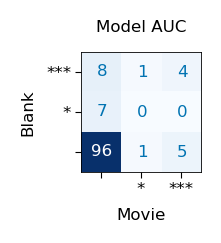

In [232]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    
    ax.imshow(np.array(mat).T, cmap='Blues')
    ax.text(-0.1, 0.1, col1[-1], color=color_dict['blue'])
    ax.text(-0.1, 1.1, col1[-2], color=color_dict['blue'])
    ax.text(-0.25, 2.1, col1[0], color='white')

    ax.text(0.9, 0.12, col2[-1], color=color_dict['blue'])
    ax.text(0.9, 1.12, col2[-2], color=color_dict['blue'])
    ax.text(0.9, 2.12, col2[0], color=color_dict['blue'])

    ax.text(1.9, 0.12, col3[-1], color=color_dict['blue'])
    ax.text(1.9, 1.12, col3[-2], color=color_dict['blue'])
    ax.text(1.9, 2.12, col3[0], color=color_dict['blue'])
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    ax.set_xticks([0, 1, 2], ['', '*', '***'])
    ax.set_yticks([2, 1, 0], ['', '*', '***'])
    #axpos = ax.get_position()
    #ax.set_position([axpos.x0+0.1, axpos.y0,  axpos.width, axpos.height])

    #ax.set_ylim([0,30])
    #ax.set_yticks([0, 15, 30])
    ax.set_title('Model AUC', y=1.1)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    

    #sns.despine(offset=5, trim=False, ax=ax)

fig.savefig('./plots/Fig4/sig_units_stim_vs_spont.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig('./plots/Fig4/sig_units_stim_vs_spont.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

# Supplementary Figure

* omi vs Firing rates scatters
* resample trials to make sure it is not an artefact of trial numbers
* model intercepts well explains average firing rates, so filter weights are not affected
* compare stim models without movie input to make sure we have a fair comparison